In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from functions.display_plots import DisplayInitialInfo

In [3]:
data = pd.read_csv('../data/preprocessed_data/p_data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Values: 0: Benign; 1: Malignant
data['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

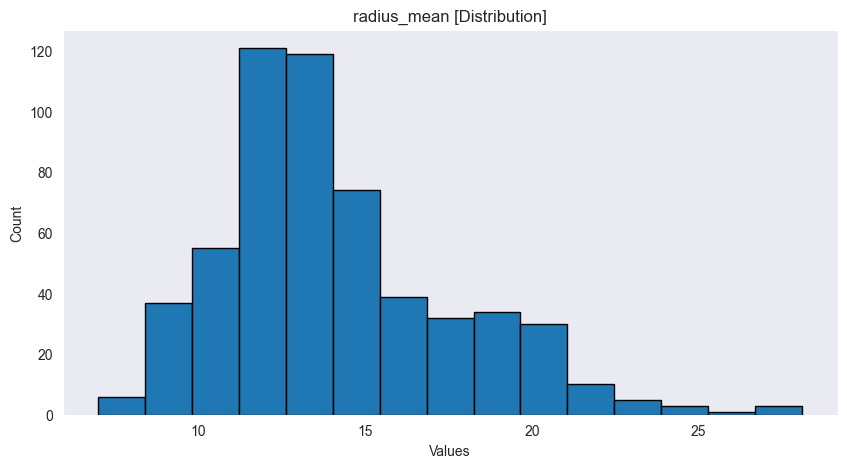

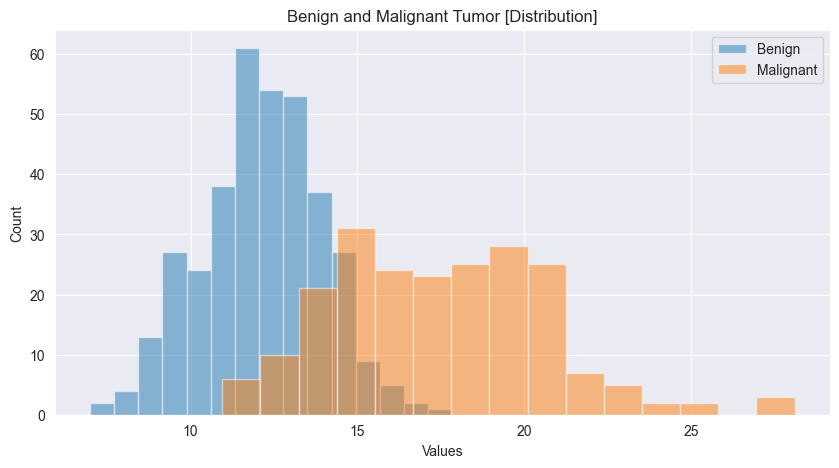

In [5]:
info = DisplayInitialInfo(dataset=data, target_column="diagnosis", feature="radius_mean")
info.display_all()

### Conclusions
- Benign distribution looks like a normal (Gaussian)
- Malignant distribution looks like a bimodal
- In the next tests will determines what are the exact distributions

### Boxplot - Radius Mean
This boxplot illustrate the distribution of `Radius Mean values`, allowing comparison between Negative and Positive results

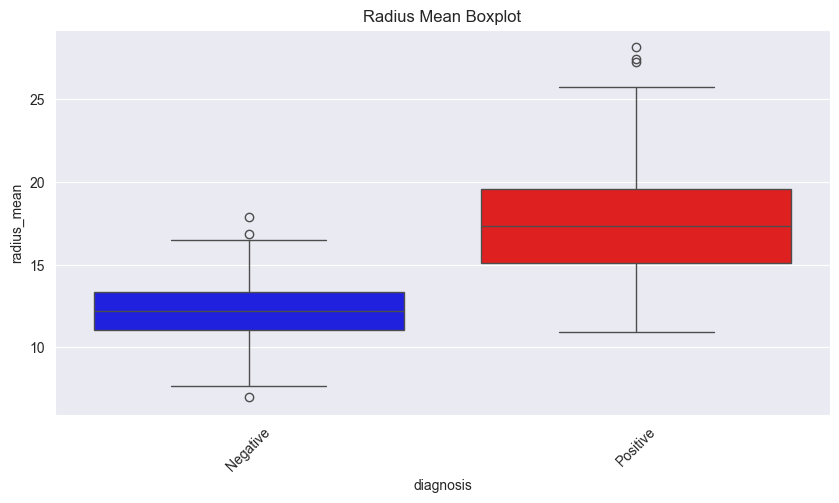

In [6]:
# Аdd boxplot to visualize outliers and compare distribution for Negative vs. Positive results
plt.figure(figsize=(10, 5))
sns.boxplot(x='diagnosis', 
            y='radius_mean', 
            data=data, 
            hue='diagnosis',
            palette={0: 'blue', 1: 'red'},
            dodge=False)

plt.title('Radius Mean Boxplot')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=45)
plt.legend([],[], frameon=False)
plt.show()

### t-test analysis
With this test we will determine is there or not relationship between the diagnosis groups and the Radius mean feature.

In [7]:
negative = data[data['diagnosis'] == 0]['radius_mean']
positive = data[data['diagnosis'] == 1]['radius_mean']

t_stat, p_value = ttest_ind(negative, positive)

results = {
    'Feature': ['Radius Mean'],
    't-statistic': t_stat,
    'p-value': p_value
}

df_results = pd.DataFrame(results)

display(df_results)

,Feature,t-statistic,p-value
0,Radius Mean,-25.435822,8.465941e-96


### Conclusions:
`t-statistic:` measure the difference between the means of two groups relative to the variation within the groups.<br>It shows how many times larger the mean difference is compared to the noise in data<br>
`p-value:`  If **p-value** is too small, we reject $H_0$ (the null hypothesis) as in our case. <br>
It's mean there is significant relationship between the groups.